<a href="https://colab.research.google.com/github/ta1231/ML_Practice/blob/main/Turbofan_Autoencoder_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping


In [ ]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]

In [ ]:
from google.colab import drive
train=pd.read_csv("/content/train_FD001.txt",sep=" ",names=columns)
test=pd.read_csv("/content/test_FD001.txt",sep=" ",names=columns)
test_results=pd.read_csv("/content/RUL_FD001.txt",sep=" ",header=None)

Text(0.5, 1.0, 'Engine LifeTime')

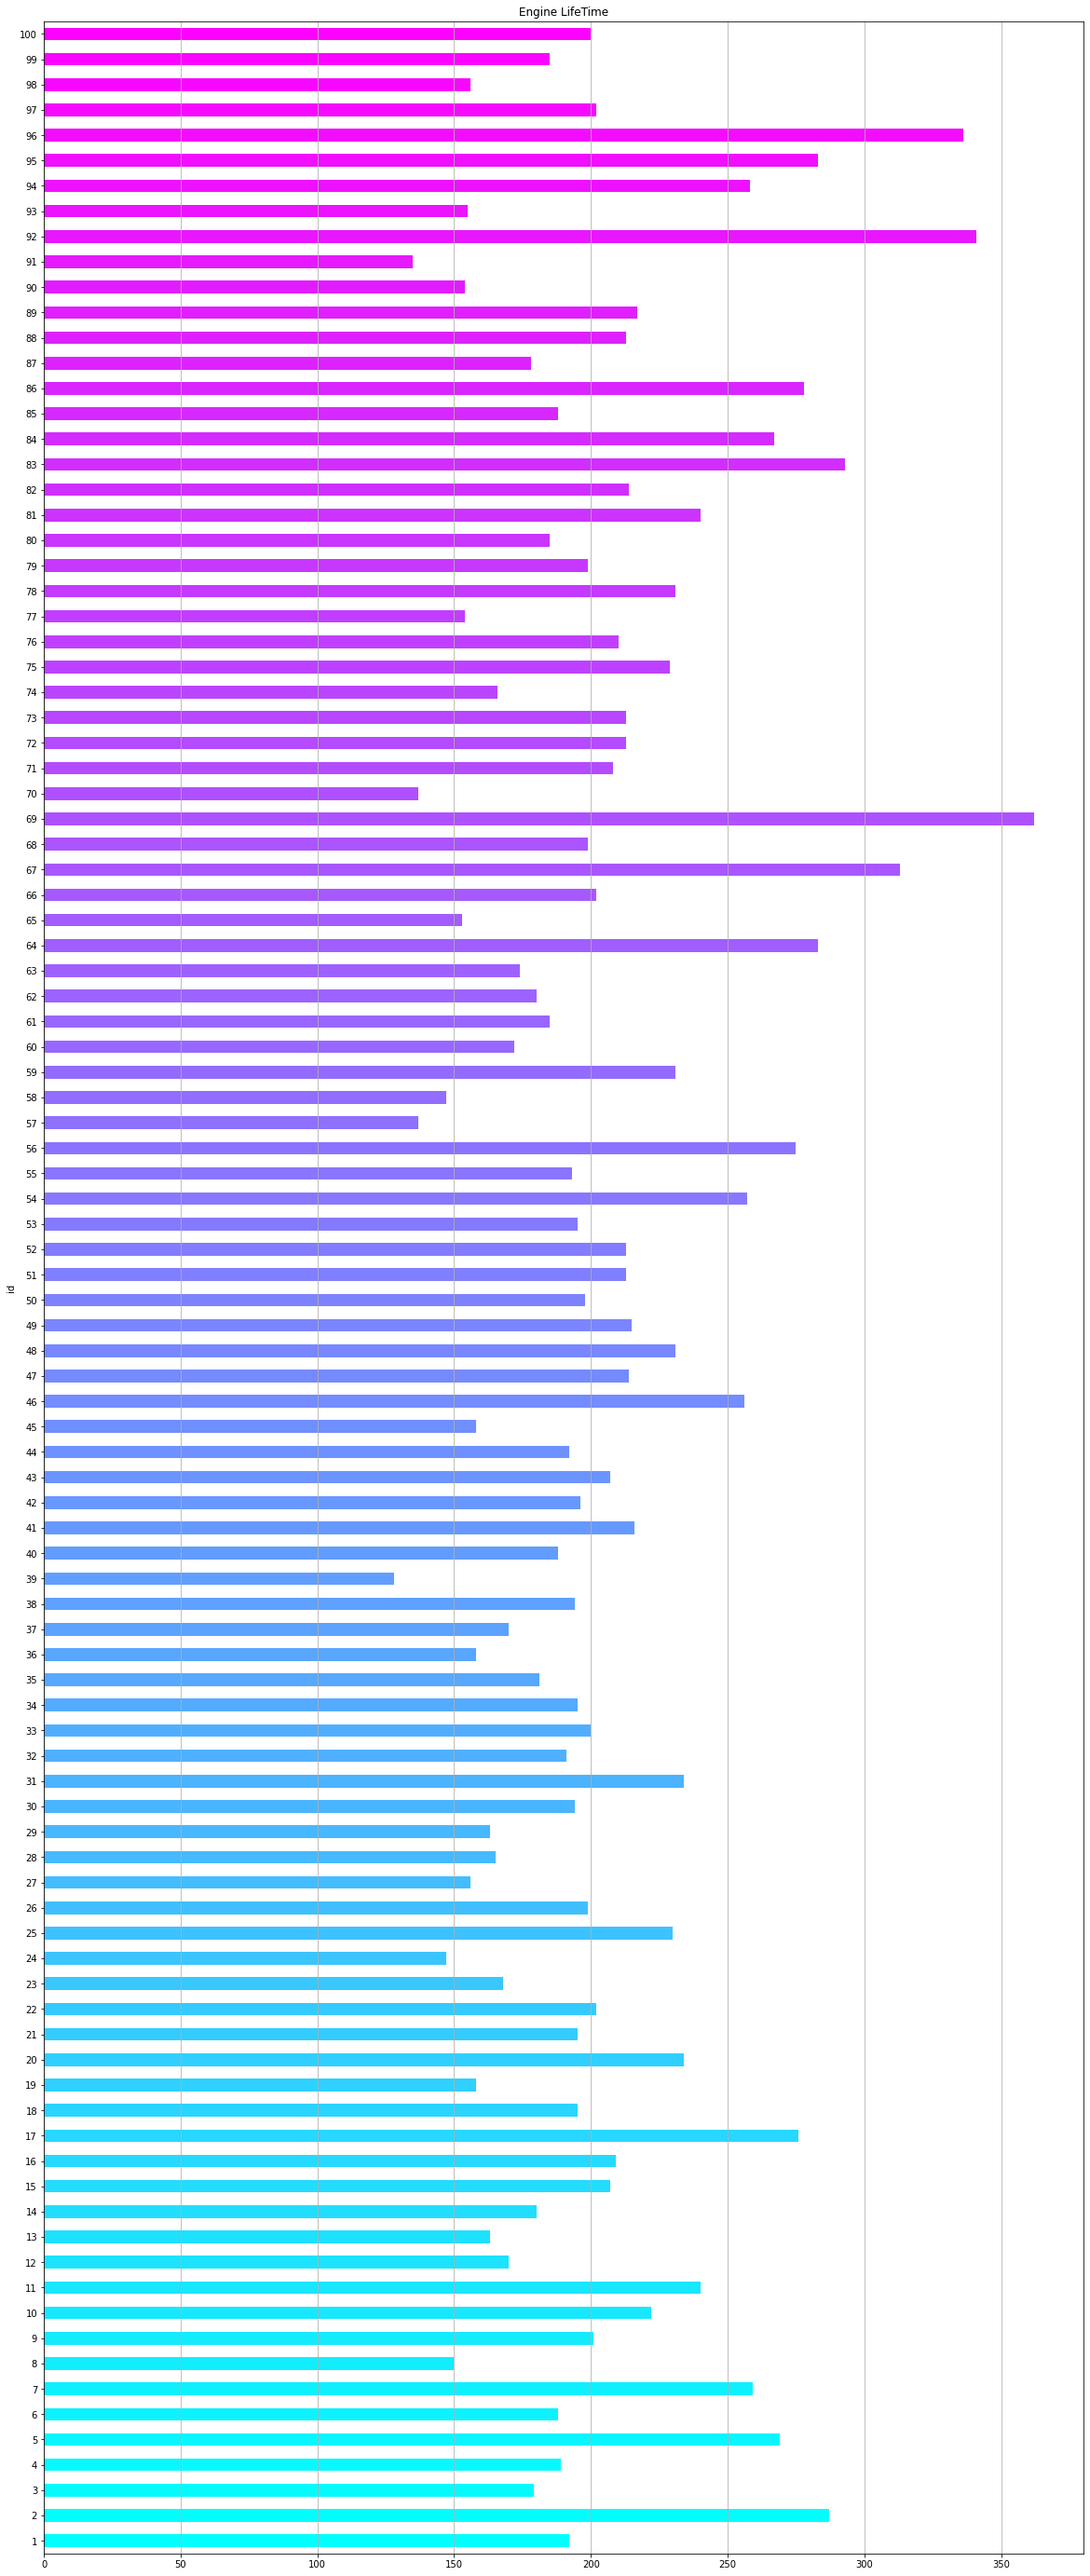

In [ ]:
import matplotlib.cm as cm
colors = [plt.cm.cool(i/100) for i in range(100)]

plt.figure(figsize=(20, 50))
# select max(cycle) from train group by id;
ax = train.groupby('id')['cycle'].max().plot(kind = 'barh', color = colors)
ax.grid(axis='x')
plt.title('Engine LifeTime')

In [ ]:
df_train = train.drop(['sensor22', 'sensor23'], axis=1)
df_test = test.drop(['sensor22', "sensor23"], axis=1)
print(df_train.columns)
print(df_test.columns)

Index(['id', 'cycle', 'op1', 'op2', 'op3', 'sensor1', 'sensor2', 'sensor3',
       'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9',
       'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
       'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21'],
      dtype='object')
Index(['id', 'cycle', 'op1', 'op2', 'op3', 'sensor1', 'sensor2', 'sensor3',
       'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9',
       'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
       'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21'],
      dtype='object')


In [ ]:
df_train['remaining_cycle'] = df_train.groupby(['id'])['cycle'].transform(max)-df_train['cycle']

In [ ]:
cycle=10
df_train['label'] = df_train['remaining_cycle'].apply(lambda x: 1 if x <= cycle else 0)

In [ ]:
# plot all operational settings and sensors in the training set
from plotly.subplots import make_subplots
import plotly.graph_objs as go

rows = len(train.columns.difference(["cycle", "engine_no", "rul"]))
fig = make_subplots(
    rows=rows, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.01,
    subplot_titles=train.columns.difference(["cycle", "engine_no", "rul"])
)

row = 1
for s in train.columns.difference(["cycle", "engine_no", "rul"]):
  for engine, engine_no in train.groupby("id"):
    fig.add_trace(go.Scatter(x=engine_no["cycle"], y=engine_no[s],mode="lines",name=engine),row=row, col=1)

  row = row+1

fig.update_layout(
    height=2000,
    showlegend=True
)

fig.show()

In [ ]:
import scipy.stats as stats

features=df_train.iloc[:, 0:28]

corr_coefficient=pd.DataFrame(np.zeros((28,28)))
flist=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21", "remaining_cycle", "label"]
corr_coefficient.columns = flist
corr_coefficient.index = flist

def corr_c(dataframe):
    col_length=len(dataframe.columns)
    idx_length=len(dataframe.index)
    for idx in range(idx_length):
        for col in range(col_length):
            dataframe.iloc[idx,col] = stats.pearsonr(features[flist[idx]], features[flist[col]])[0]
    return dataframe


corr_c(corr_coefficient)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficent is not defined.



id     cycle  ...  remaining_cycle     label
id               1.000000  0.078753  ...         0.078753 -0.008173
cycle            0.078753  1.000000  ...        -0.736241  0.318711
op1             -0.017895 -0.004527  ...        -0.003198  0.000016
op2             -0.006197  0.016132  ...        -0.001948 -0.003523
op3                   NaN       NaN  ...              NaN       NaN
sensor1               NaN       NaN  ...              NaN       NaN
sensor2          0.014133  0.549898  ...        -0.606484  0.428997
sensor3          0.012621  0.543947  ...        -0.584520  0.416492
sensor4          0.026116  0.624577  ...        -0.678948  0.479081
sensor5               NaN       NaN  ...              NaN       NaN
sensor6          0.026431  0.105980  ...        -0.128348  0.033624
sensor7         -0.032073 -0.595914  ...         0.657223 -0.460901
sensor8          0.039929  0.475977  ...        -0.563968  0.407801
sensor9         -0.052053  0.443999  ...        -0.390102  0.319857
sensor10              NaN       NaN  ...              NaN       NaN
sensor11         0.024707  0.634385  ...        -0.696228  0.489379
sensor12        -0.031882 -0.611354  ...         0.671983 -0.469669
sensor13         0.044230  0.477523  ...        -0.562569  0.407785
sensor14        -0.059473  0.370324  ...        -0.306769  0.261739
sensor15         0.022486  0.588676  ...        -0.642667  0.457347
sensor16              NaN       NaN  ...              NaN       NaN
sensor17         0.013513  0.566995  ...        -0.606154  0.430213
sensor18              NaN       NaN  ...              NaN       NaN
sensor19              NaN       NaN  ...              NaN       NaN
sensor20        -0.020589 -0.583597  ...         0.629428 -0.447204
sensor21        -0.016465 -0.585923  ...         0.635662 -0.445780
remaining_cycle  0.078753 -0.736241  ...         1.000000 -0.354219
label           -0.008173  0.318711  ...        -0.354219  1.000000

[28 rows x 28 columns]

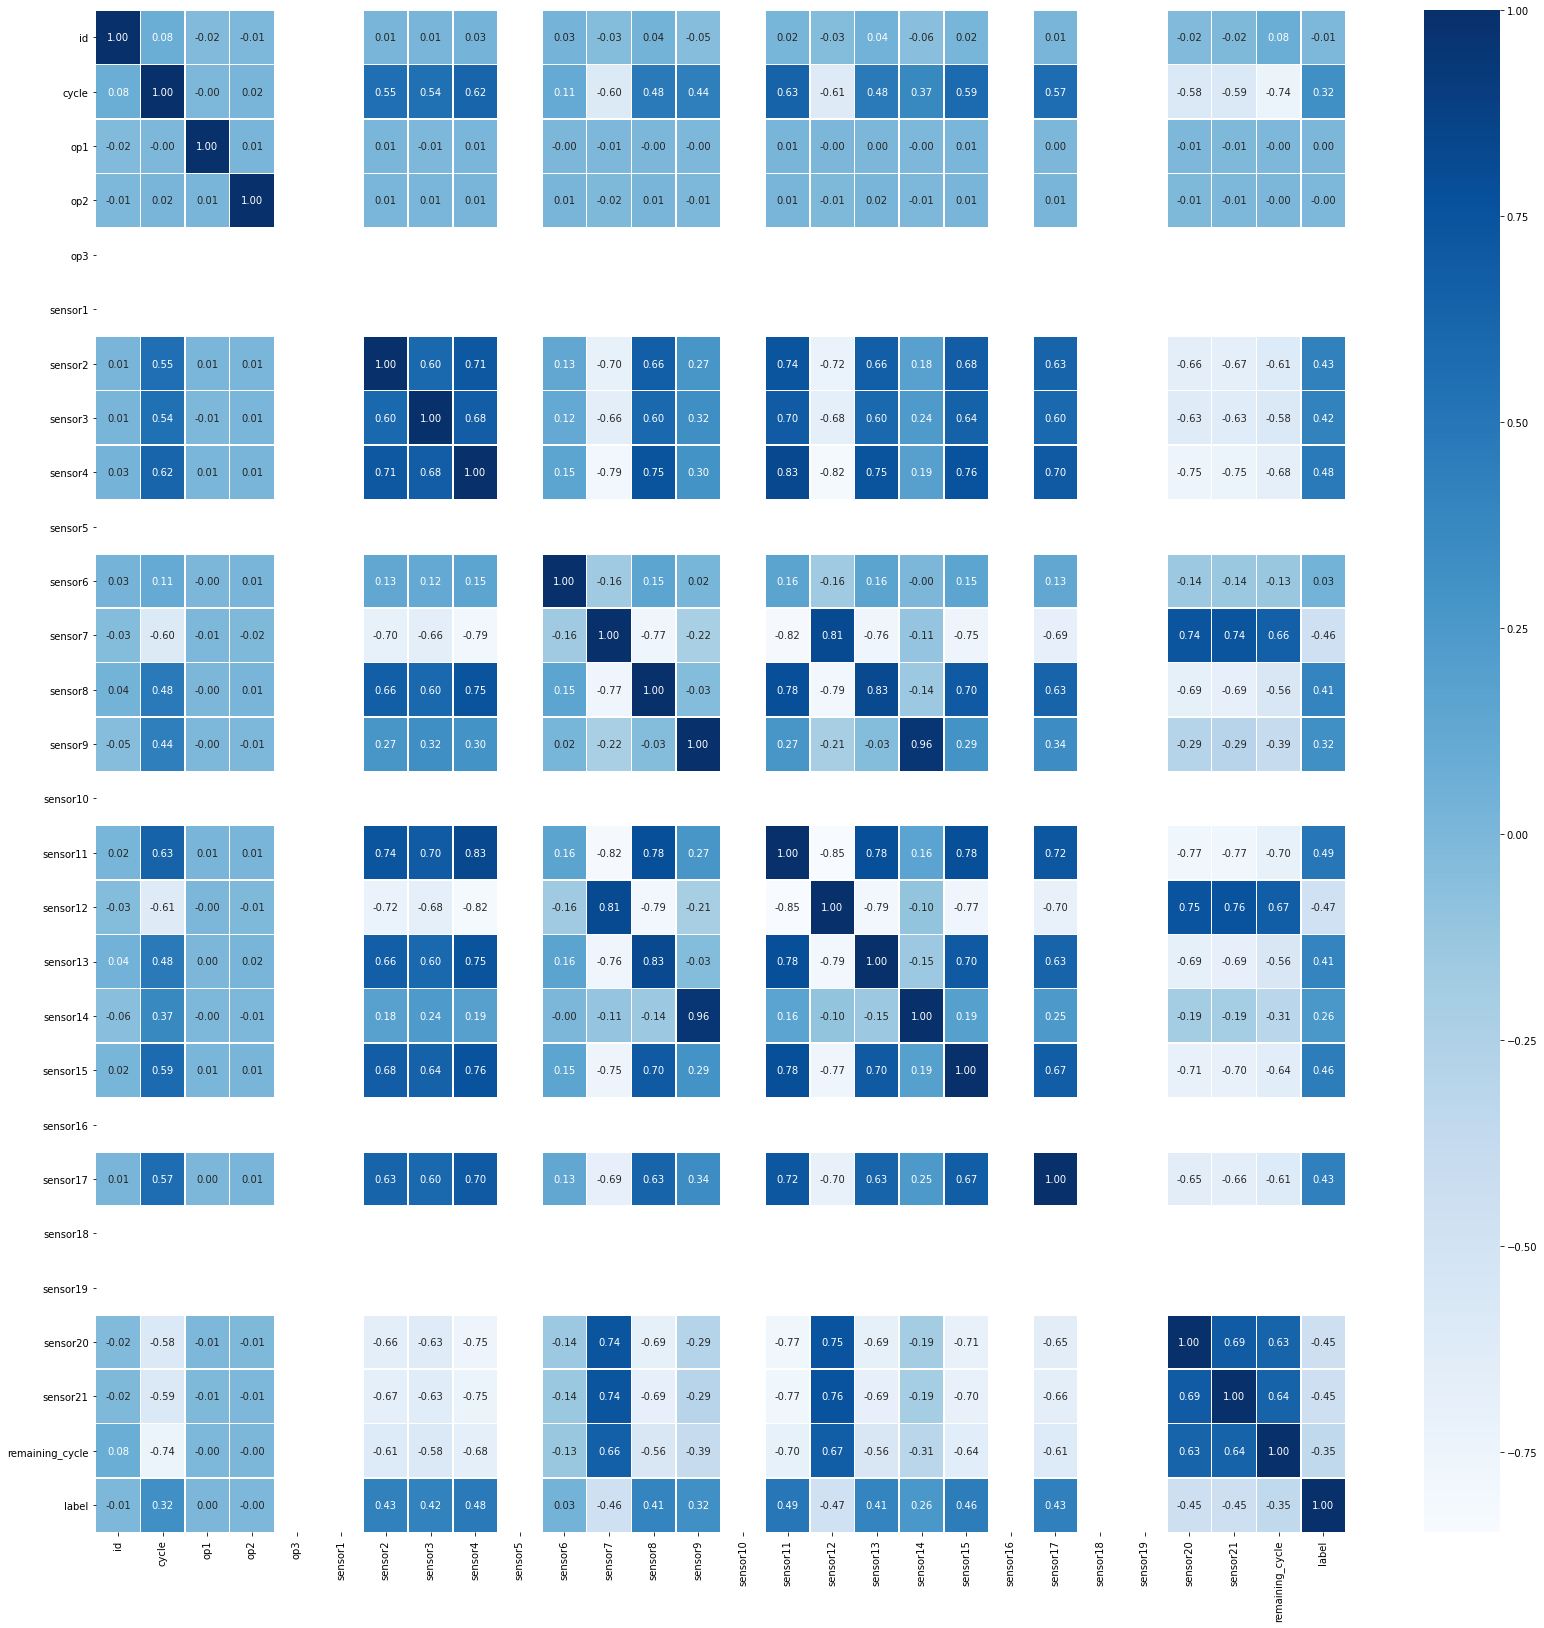

In [ ]:
plt.figure(figsize=(28,28))
sns.heatmap(corr_coefficient, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
df_train.describe()

id         cycle  ...  remaining_cycle         label
count  20631.000000  20631.000000  ...     20631.000000  20631.000000
mean      51.506568    108.807862  ...       107.807862      0.053318
std       29.227633     68.880990  ...        68.880990      0.224672
min        1.000000      1.000000  ...         0.000000      0.000000
25%       26.000000     52.000000  ...        51.000000      0.000000
50%       52.000000    104.000000  ...       103.000000      0.000000
75%       77.000000    156.000000  ...       155.000000      0.000000
max      100.000000    362.000000  ...       361.000000      1.000000

[8 rows x 28 columns]

In [ ]:
# 양품

TF_Y = df_train[df_train['label']==0]
print('TF의 양품 개수:', len(TF_Y))

# 불량
TF_N = df_train[df_train['label']==1]
print('TF의 불량 개수:', len(TF_N))

TF의 양품 개수: 19531
TF의 불량 개수: 1100


In [ ]:
# 양품
TF_Y.drop(['id', "remaining_cycle", 'label', 'op3', 'sensor1', 'sensor9', 'sensor10', 'sensor16', 'sensor18', 'sensor19'] ,axis=1, inplace=True)

# 불량
TF_N.drop(['id', "remaining_cycle", 'label', 'op3', 'sensor1', 'sensor9', 'sensor10', 'sensor16', 'sensor18', 'sensor19'] ,axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
scaler = MinMaxScaler()

# 양품
TF_Y = scaler.fit_transform(TF_Y)

# 불량
TF_N = scaler.fit_transform(TF_N)

In [ ]:
TF_train_Y = TF_Y[:12000]

TF_test_Y = TF_Y[12000:]

TF_test_N = TF_N


print('TurboFan의 양품 학습 데이터셋 개수:', len(TF_train_Y))
print('TurboFan의 양품 검증 데이터셋 개수:', len(TF_test_Y))
print('TurboFan의 불량 검증 데이터셋 개수:', len(TF_test_N))

TurboFan의 양품 학습 데이터셋 개수: 12000
TurboFan의 양품 검증 데이터셋 개수: 7531
TurboFan의 불량 검증 데이터셋 개수: 1100


In [ ]:
# 불량 검증 데이터셋: 550개
np.random.shuffle(TF_test_N)
TF_test_N2 = TF_test_N[:100]
# 양품 검증 데이터셋: 2000개
np.random.shuffle(TF_test_Y)
TF_test_Y2 = TF_test_Y[:2000]
# 초기 양품 학습 데이터셋: 400
labelY = TF_train_Y[:400]

In [ ]:
# unlabel된 데이터: 초기 양품 학습 데이터 셋과 검증 데이터 셋을 제외한 모든 데이터
unlabel = np.concatenate((TF_train_Y[400:], TF_test_N[100:], TF_test_Y[2000:]), axis=0)
np.random.shuffle(unlabel)

In [ ]:
# 오토인코더 구조
# dropout_AE 모델은 train set의 크기가 커질수록 split이 잘된다는 것을 증명하기 위한 모델임
dropout_encoder = Sequential([
    Dropout(0.3),
    Dense(15, activation="relu"),
    Dense(5, activation="relu")
])


dropout_decoder = Sequential([
    Dense(15, activation="relu", input_shape=[5]),
    Dense(TF_train_Y.shape[1], activation="relu"),
])

dropout_AE = Sequential([dropout_encoder, dropout_decoder])

In [ ]:
# 손실함수 옵티마이저 정의
dropout_AE.compile(loss="mse", optimizer=Adam(lr=0.01), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/50
3/3 [==============================] - 1s 113ms/step - loss: 0.2079 - accuracy: 0.1750 - val_loss: 0.1603 - val_accuracy: 0.0000e+00
Epoch 2/50
3/3 [==============================] - 0s 17ms/step - loss: 0.1334 - accuracy: 0.1625 - val_loss: 0.0946 - val_accuracy: 0.0000e+00
Epoch 3/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0858 - accuracy: 0.3250 - val_loss: 0.0641 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0669 - accuracy: 1.0000 - val_loss: 0.0515 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0531 - accuracy: 0.9500 - val_loss: 0.0455 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 23ms/step - loss: 0.0473 - accuracy: 0.9750 - val_loss: 0.0461 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 14ms/step - loss: 0.0441 - accuracy: 0.9875 - val_loss: 0.0429 - val_accuracy: 1.0000
Epoch 8/50
3/3 [==

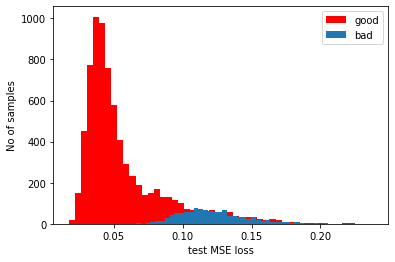

Epoch 1/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0396 - accuracy: 1.0000 - val_loss: 0.0746 - val_accuracy: 0.8500
Epoch 2/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0392 - accuracy: 1.0000 - val_loss: 0.0721 - val_accuracy: 0.8500
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0384 - accuracy: 1.0000 - val_loss: 0.0740 - val_accuracy: 0.8500
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0377 - accuracy: 1.0000 - val_loss: 0.0734 - val_accuracy: 0.8500
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0379 - accuracy: 1.0000 - val_loss: 0.0731 - val_accuracy: 0.8500
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0378 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 0.8500
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0373 - accuracy: 1.0000 - val_loss: 0.0706 - val_accuracy: 0.8500
Epoch 8/50
6/6 [================

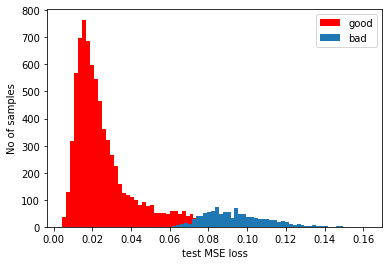

Epoch 1/50
14/14 [==============================] - 0s 7ms/step - loss: 0.0208 - accuracy: 0.9400 - val_loss: 0.0269 - val_accuracy: 0.9800
Epoch 2/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0204 - accuracy: 0.9350 - val_loss: 0.0260 - val_accuracy: 0.9800
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0207 - accuracy: 0.9475 - val_loss: 0.0264 - val_accuracy: 0.9800
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0204 - accuracy: 0.9275 - val_loss: 0.0271 - val_accuracy: 0.9800
Epoch 5/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0200 - accuracy: 0.9175 - val_loss: 0.0294 - val_accuracy: 0.9800
Epoch 6/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0200 - accuracy: 0.9150 - val_loss: 0.0282 - val_accuracy: 0.9800
Epoch 7/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0199 - accuracy: 0.9350 - val_loss: 0.0297 - val_accuracy: 0.9800
Epoch 8/50
14/14 [==

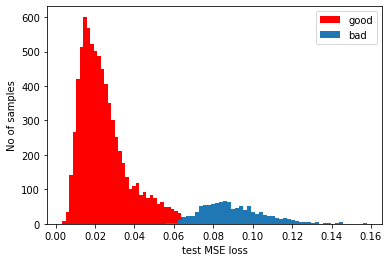

Epoch 1/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0220 - accuracy: 0.9500 - val_loss: 0.0189 - val_accuracy: 0.9100
Epoch 2/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0219 - accuracy: 0.9600 - val_loss: 0.0203 - val_accuracy: 0.9100
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0215 - accuracy: 0.9488 - val_loss: 0.0207 - val_accuracy: 0.9100
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 0.9563 - val_loss: 0.0198 - val_accuracy: 0.9100
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0215 - accuracy: 0.9550 - val_loss: 0.0211 - val_accuracy: 0.9100
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0216 - accuracy: 0.9650 - val_loss: 0.0212 - val_accuracy: 0.9100
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0220 - accuracy: 0.9575 - val_loss: 0.0208 - val_accuracy: 0.9100
Epoch 8/50
27/27 [==

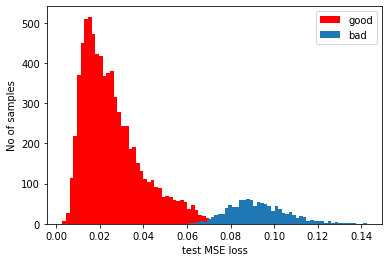

Epoch 1/50
40/40 [==============================] - 1s 8ms/step - loss: 0.0231 - accuracy: 0.9533 - val_loss: 0.0253 - val_accuracy: 0.9767
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0233 - accuracy: 0.9517 - val_loss: 0.0251 - val_accuracy: 0.9767
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0233 - accuracy: 0.9517 - val_loss: 0.0251 - val_accuracy: 0.9767
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0234 - accuracy: 0.9600 - val_loss: 0.0255 - val_accuracy: 0.9767
Epoch 5/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0230 - accuracy: 0.9525 - val_loss: 0.0253 - val_accuracy: 0.9767
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0233 - accuracy: 0.9592 - val_loss: 0.0258 - val_accuracy: 0.9767
Epoch 7/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0231 - accuracy: 0.9550 - val_loss: 0.0251 - val_accuracy: 0.9767
Epoch 8/50
40/40 [==

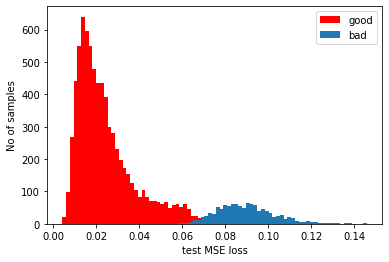

Epoch 1/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9644 - val_loss: 0.0228 - val_accuracy: 0.9275
Epoch 2/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9600 - val_loss: 0.0219 - val_accuracy: 0.9275
Epoch 3/50
54/54 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9631 - val_loss: 0.0224 - val_accuracy: 0.9275
Epoch 4/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9619 - val_loss: 0.0228 - val_accuracy: 0.9275
Epoch 5/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9625 - val_loss: 0.0211 - val_accuracy: 0.9275
Epoch 6/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9650 - val_loss: 0.0210 - val_accuracy: 0.9275
Epoch 7/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9625 - val_loss: 0.0201 - val_accuracy: 0.9275
Epoch 8/50
54/54 [==

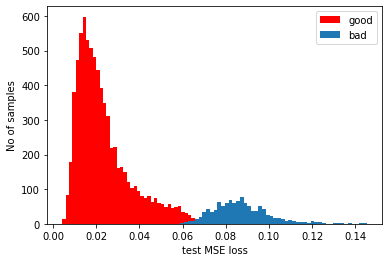

Epoch 1/50
80/80 [==============================] - 0s 5ms/step - loss: 0.0217 - accuracy: 0.9500 - val_loss: 0.0242 - val_accuracy: 0.9817
Epoch 2/50
80/80 [==============================] - 0s 4ms/step - loss: 0.0216 - accuracy: 0.9625 - val_loss: 0.0235 - val_accuracy: 0.9817
Epoch 3/50
80/80 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 0.9579 - val_loss: 0.0237 - val_accuracy: 0.9817
Epoch 4/50
80/80 [==============================] - 0s 4ms/step - loss: 0.0216 - accuracy: 0.9542 - val_loss: 0.0253 - val_accuracy: 0.9817
Epoch 5/50
80/80 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 0.9579 - val_loss: 0.0252 - val_accuracy: 0.9817
Epoch 6/50
80/80 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 0.9567 - val_loss: 0.0240 - val_accuracy: 0.9817
Epoch 7/50
80/80 [==============================] - 0s 5ms/step - loss: 0.0215 - accuracy: 0.9575 - val_loss: 0.0236 - val_accuracy: 0.9817
Epoch 8/50
80/80 [==

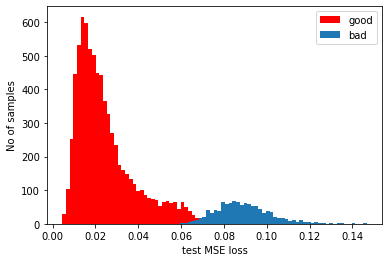

Epoch 1/50
107/107 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9622 - val_loss: 0.0246 - val_accuracy: 0.9887
Epoch 2/50
107/107 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9575 - val_loss: 0.0246 - val_accuracy: 0.9887
Epoch 3/50
107/107 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9634 - val_loss: 0.0229 - val_accuracy: 0.9887
Epoch 4/50
107/107 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9634 - val_loss: 0.0230 - val_accuracy: 0.9887
Epoch 5/50
107/107 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9619 - val_loss: 0.0244 - val_accuracy: 0.9887
Epoch 6/50
107/107 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9625 - val_loss: 0.0223 - val_accuracy: 0.9887
Epoch 7/50
107/107 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9631 - val_loss: 0.0239 - val_accuracy: 0.9887
Epoch 

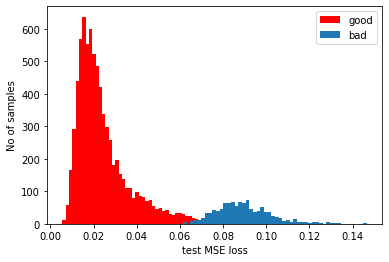

Epoch 1/50
134/134 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9680 - val_loss: 0.0236 - val_accuracy: 0.9930
Epoch 2/50
134/134 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9690 - val_loss: 0.0240 - val_accuracy: 0.9930
Epoch 3/50
134/134 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9670 - val_loss: 0.0252 - val_accuracy: 0.9930
Epoch 4/50
134/134 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9700 - val_loss: 0.0242 - val_accuracy: 0.9930
Epoch 5/50
134/134 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9670 - val_loss: 0.0244 - val_accuracy: 0.9930
Epoch 6/50
134/134 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9670 - val_loss: 0.0243 - val_accuracy: 0.9930
Epoch 7/50
134/134 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9668 - val_loss: 0.0240 - val_accuracy: 0.9930
Epoch 

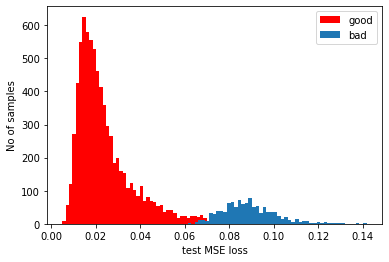

Epoch 1/50
160/160 [==============================] - 1s 4ms/step - loss: 0.0219 - accuracy: 0.9690 - val_loss: 0.0221 - val_accuracy: 0.9708
Epoch 2/50
160/160 [==============================] - 1s 4ms/step - loss: 0.0219 - accuracy: 0.9717 - val_loss: 0.0226 - val_accuracy: 0.9708
Epoch 3/50
160/160 [==============================] - 1s 4ms/step - loss: 0.0219 - accuracy: 0.9733 - val_loss: 0.0226 - val_accuracy: 0.9708
Epoch 4/50
160/160 [==============================] - 1s 4ms/step - loss: 0.0218 - accuracy: 0.9731 - val_loss: 0.0226 - val_accuracy: 0.9708
Epoch 5/50
160/160 [==============================] - 1s 4ms/step - loss: 0.0219 - accuracy: 0.9735 - val_loss: 0.0225 - val_accuracy: 0.9708
Epoch 6/50
160/160 [==============================] - 1s 4ms/step - loss: 0.0218 - accuracy: 0.9729 - val_loss: 0.0225 - val_accuracy: 0.9708
Epoch 7/50
160/160 [==============================] - 1s 4ms/step - loss: 0.0219 - accuracy: 0.9731 - val_loss: 0.0228 - val_accuracy: 0.9708
Epoch 

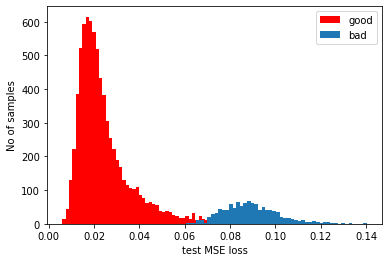

Epoch 1/50
187/187 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9723 - val_loss: 0.0231 - val_accuracy: 0.9679
Epoch 2/50
187/187 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9732 - val_loss: 0.0236 - val_accuracy: 0.9679
Epoch 3/50
187/187 [==============================] - 1s 3ms/step - loss: 0.0217 - accuracy: 0.9720 - val_loss: 0.0235 - val_accuracy: 0.9679
Epoch 4/50
187/187 [==============================] - 1s 3ms/step - loss: 0.0215 - accuracy: 0.9721 - val_loss: 0.0231 - val_accuracy: 0.9679
Epoch 5/50
187/187 [==============================] - 1s 3ms/step - loss: 0.0216 - accuracy: 0.9714 - val_loss: 0.0233 - val_accuracy: 0.9679
Epoch 6/50
187/187 [==============================] - 1s 3ms/step - loss: 0.0217 - accuracy: 0.9732 - val_loss: 0.0236 - val_accuracy: 0.9679
Epoch 7/50
187/187 [==============================] - 1s 3ms/step - loss: 0.0216 - accuracy: 0.9730 - val_loss: 0.0251 - val_accuracy: 0.9679
Epoch 

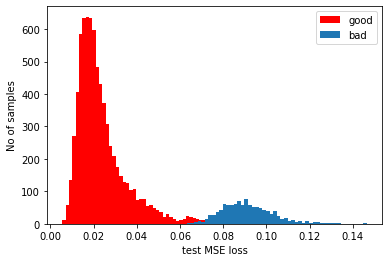

Epoch 1/50
214/214 [==============================] - 1s 3ms/step - loss: 0.0216 - accuracy: 0.9702 - val_loss: 0.0253 - val_accuracy: 0.9837
Epoch 2/50
214/214 [==============================] - 1s 3ms/step - loss: 0.0216 - accuracy: 0.9688 - val_loss: 0.0238 - val_accuracy: 0.9837
Epoch 3/50
214/214 [==============================] - 1s 3ms/step - loss: 0.0215 - accuracy: 0.9705 - val_loss: 0.0237 - val_accuracy: 0.9837
Epoch 4/50
214/214 [==============================] - 1s 3ms/step - loss: 0.0216 - accuracy: 0.9694 - val_loss: 0.0238 - val_accuracy: 0.9837
Epoch 5/50
214/214 [==============================] - 1s 2ms/step - loss: 0.0215 - accuracy: 0.9700 - val_loss: 0.0241 - val_accuracy: 0.9837
Epoch 6/50
214/214 [==============================] - 1s 3ms/step - loss: 0.0216 - accuracy: 0.9670 - val_loss: 0.0241 - val_accuracy: 0.9837
Epoch 7/50
214/214 [==============================] - 1s 3ms/step - loss: 0.0216 - accuracy: 0.9680 - val_loss: 0.0239 - val_accuracy: 0.9837
Epoch 

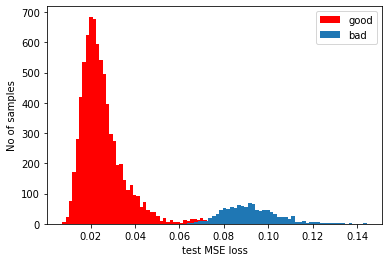

Epoch 1/50
267/267 [==============================] - 1s 3ms/step - loss: 0.0217 - accuracy: 0.9716 - val_loss: 0.0238 - val_accuracy: 0.9720
Epoch 2/50
267/267 [==============================] - 1s 2ms/step - loss: 0.0216 - accuracy: 0.9718 - val_loss: 0.0224 - val_accuracy: 0.9720
Epoch 3/50
267/267 [==============================] - 1s 3ms/step - loss: 0.0216 - accuracy: 0.9722 - val_loss: 0.0237 - val_accuracy: 0.9720
Epoch 4/50
267/267 [==============================] - 1s 3ms/step - loss: 0.0216 - accuracy: 0.9724 - val_loss: 0.0236 - val_accuracy: 0.9720
Epoch 5/50
267/267 [==============================] - 1s 3ms/step - loss: 0.0216 - accuracy: 0.9699 - val_loss: 0.0241 - val_accuracy: 0.9720
Epoch 6/50
267/267 [==============================] - 1s 3ms/step - loss: 0.0216 - accuracy: 0.9724 - val_loss: 0.0235 - val_accuracy: 0.9720
Epoch 7/50
267/267 [==============================] - 1s 3ms/step - loss: 0.0217 - accuracy: 0.9701 - val_loss: 0.0240 - val_accuracy: 0.9720
Epoch 

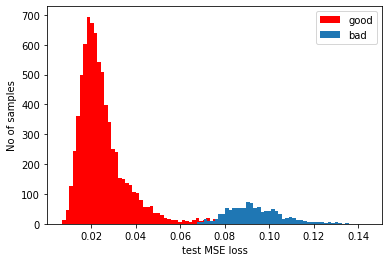

In [ ]:
for i in [100, 200, 500, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 10000]:
  history = dropout_AE.fit(TF_train_Y[:i], TF_train_Y[:i], batch_size=30, epochs=50, shuffle = True, validation_split=0.2, callbacks=[EarlyStopping(monitor="val_loss", patience=7, mode="min")])
  # 학습 데이터의 예측값

    # 학습 데이터의 예측값

  TF_train_pred = dropout_AE.predict(TF_train_Y)
  # 학습 데이터의 복원 오차 (예측값 – 실제 값)
  TF_train_loss = np.mean(np.square(TF_train_pred - TF_train_Y), axis=1)

  # 임계치
  threshold = np.mean(TF_train_loss)  + np.std(TF_train_loss)

  print("복원 오류 임계치: ", threshold) #결과는 아래에서 확인 가능하다.

  # 평가 데이터의 양품

  # 예측값
  TF_predict_Y = dropout_AE.predict(TF_test_Y)

  # 양품 평가 데이터의 복원 오차 (예측값 – 실제 값)
  TF_test_Y_mse= np.mean(np.square(TF_predict_Y - TF_test_Y), axis=1)



  # 평가 데이터의 불량

  # 예측값
  TF_predict_N = dropout_AE.predict(TF_test_N)
  # 불량 평가 데이터의 복원 오차 (예측값 – 실제 값)
  TF_test_N_mse = np.mean(np.square(TF_predict_N - TF_test_N), axis=1)


  plt.hist(TF_test_Y_mse, bins=50, color='r', label='good')
  plt.hist(TF_test_N_mse, bins=50, label = 'bad')
  # plt.axvline(threshold, color = 'y', linestyle = '--', label = "Threshold")
  plt.xlabel("test MSE loss")
  plt.ylabel("No of samples")
  plt.legend()
  plt.show()

In [ ]:
# 오토인코더 구조

dropout_encoder = Sequential([
    Dropout(0.3),
    Dense(15, activation="relu"),
    Dense(5, activation="relu")
])

dropout_decoder = Sequential([
    Dense(15, activation="relu", input_shape=[5]),
    Dense(TF_train_Y.shape[1], activation="relu"),
])

newAE = Sequential([dropout_encoder, dropout_decoder])

In [ ]:
newAE.compile(loss="mse", optimizer=Adam(lr=0.01), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:
history = newAE.fit(labelY, labelY, batch_size=30, epochs=50, shuffle = True, validation_split=0.2, callbacks=[EarlyStopping(monitor="val_loss", patience=7, mode="min")])

Epoch 1/50
11/11 [==============================] - 1s 23ms/step - loss: 0.1560 - accuracy: 0.2188 - val_loss: 0.0978 - val_accuracy: 0.9750
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0875 - accuracy: 0.9312 - val_loss: 0.0707 - val_accuracy: 0.9750
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0754 - accuracy: 0.9312 - val_loss: 0.0648 - val_accuracy: 0.9750
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.0717 - accuracy: 0.9312 - val_loss: 0.0664 - val_accuracy: 0.9750
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0704 - accuracy: 0.9312 - val_loss: 0.0649 - val_accuracy: 0.9750
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0686 - accuracy: 0.9312 - val_loss: 0.0651 - val_accuracy: 0.9750
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0688 - accuracy: 0.9312 - val_loss: 0.0655 - val_accuracy: 0.9750
Epoch 8/50
11/11 [=

In [ ]:
TF_train_pred = newAE.predict(labelY)
TF_train_loss = np.mean(np.square(TF_train_pred - labelY), axis=1)
threshold = np.mean(TF_train_loss)  + np.std(TF_train_loss)

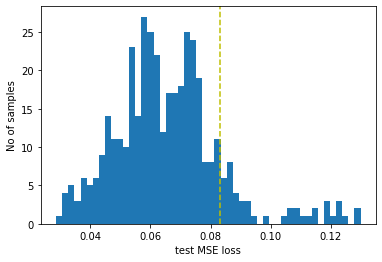

In [ ]:
plt.hist(TF_train_loss, bins=50)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.axvline(threshold, color = 'y', linestyle = '--', label = "Threshold")

In [ ]:
TF_unlabel_pred = newAE.predict(unlabel)
TF_unlabel_loss = np.mean(np.square(TF_unlabel_pred - unlabel), axis=1)

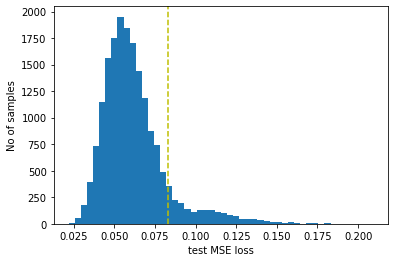

In [ ]:
plt.hist(TF_unlabel_loss, bins=50)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.axvline(threshold, color = 'y', linestyle = '--', label = "Threshold")

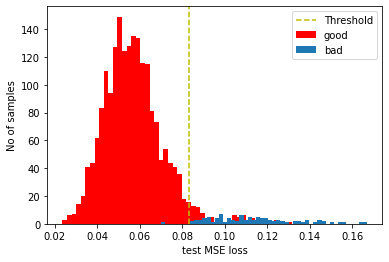

In [ ]:
# 평가 데이터의 양품

# 예측값
TF_predict_Y = newAE.predict(TF_test_Y2)

# 양품 평가 데이터의 복원 오차 (예측값 – 실제 값)
TF_test_Y_mse= np.mean(np.square(TF_predict_Y - TF_test_Y2), axis=1)

# 시각화
# plt.hist(TF_test_Y_mse, bins=50)
# plt.xlabel("test MSE loss")
# plt.ylabel("No of samples")
# plt.axvline(threshold, color = 'y', linestyle = '--', label = "Threshold")

# plt.show() 

# 불량으로 판단한 데이터 확인.
TF_test_Y_anomalies = TF_test_Y_mse > threshold
# print("불량 개수: ", np.sum(TF_test_Y_anomalies)) #결과는 아래에서 확인 가능하다

# 평가 데이터의 불량

# 예측값
TF_predict_N = newAE.predict(TF_test_N2)
# 불량 평가 데이터의 복원 오차 (예측값 – 실제 값)
TF_test_N_mse = np.mean(np.square(TF_predict_N - TF_test_N2), axis=1)

# # 시각화
# plt.hist(TF_test_N_mse, bins=50)
# plt.xlabel("test MSE loss")
# plt.ylabel("No of samples")
# plt.axvline(threshold, color = 'y', linestyle = '--', label = "Threshold")
# plt.show() 


plt.hist(TF_test_Y_mse, bins=50, color='r', label='good')
plt.hist(TF_test_N_mse, bins=50, label = 'bad')
plt.axvline(threshold, color = 'y', linestyle = '--', label = "Threshold")
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.legend()
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
TF_unlabel_loss1 = TF_unlabel_loss.reshape(TF_unlabel_loss.shape[0],1)
gm = GaussianMixture(n_components=2, random_state=0).fit(TF_unlabel_loss1)
gm.means_
gm
gm.predict(TF_unlabel_loss1)
cov = gm.covariances_
print(gm.means_)
print([ np.sqrt(  np.trace(cov[i])/2) for i in range(0,2) ])
tmp = [ np.sqrt(  np.trace(cov[i])/2) for i in range(0,2) ]
m1 = min(gm.means_)
m2 = max(gm.means_)
std1 = min(tmp)
std2 = max(tmp)

[[0.09703714]
 [0.05667412]]
[0.01841663812575993, 0.00851560473762089]


In [ ]:
pred = gm.predict(TF_unlabel_loss1)
cluster1 = 0
cluster2 = 0
for i in pred:
  if i == 0:
    cluster1 += 1
  else:
    cluster2 += 1
clusterNum = [cluster1, cluster2]
print(max(clusterNum))
print(max(clusterNum)/min(clusterNum))
n = max(clusterNum)/min(clusterNum)

16349
9.174523007856342


In [ ]:
a = 2*std2**2-2*std1**2
b = 4*std1**2*m2-4*std2**2*m1
c = 2*std2**2*m1**2-2*std1**2*m2**2-4*std1**2*std2**2*(np.log(n * std2/(std1)))
threshold = (-b+ np.sqrt(b**2 - 4 * a*c) )/ (2*a)

In [ ]:
threshold

array([0.07908458])

In [ ]:
TF_test_Y_anomalies = TF_test_Y_mse > threshold
TF_test_N_anomalies = TF_test_N_mse <= threshold

In [ ]:
TP = len(TF_test_Y_mse) - np.sum(TF_test_Y_anomalies)
FN = np.sum(TF_test_Y_anomalies)
FP = np.sum(TF_test_N_anomalies)
TN = len(TF_test_N_mse) - np.sum(TF_test_N_anomalies)

In [ ]:
print('Recall rate:', TP/(TP+FN))
print('Precision rate:', TP/(TP+FP))
print('Accuracy:', (TP+TN)/(TP+FP+FN+TN))
print('F1:', TP/(TP+0.5*(FP+FN)))

Recall rate: 0.939
Precision rate: 0.9994678020223523
Accuracy: 0.9414285714285714
F1: 0.9682907965970611


In [ ]:
y_test = np.concatenate((np.ones(2000), np.zeros(100)))
y_test

allMSE = np.concatenate((TF_test_Y_mse, TF_test_N_mse))

In [ ]:
y_proba_test = []
for i in allMSE:
  if i < threshold:
    y_proba_test.append(1)
  else:
    y_proba_test.append(0)
y_proba_test = np.array(y_proba_test)

In [ ]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, y_proba_test, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

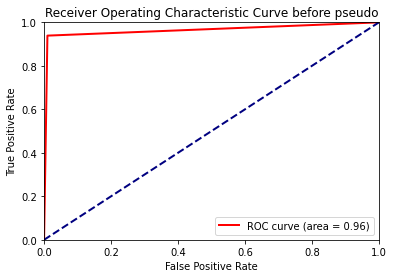

In [ ]:
# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve before pseudo')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc

0.9645

In [ ]:
threshold = np.mean(TF_train_loss)  + np.std(TF_train_loss)
threshold

0.08327009150752598

In [ ]:
mses = np.mean(np.square(newAE.predict(unlabel) - unlabel), axis = 1)
mses = pd.DataFrame(mses, columns=['mse'])

In [ ]:
mses['underthreshold'] = mses['mse'].apply(lambda x: 1 if x < threshold else 0)

In [ ]:
lst = []
for i in range(len(unlabel)):
  if mses['underthreshold'][i] == 1:
    lst.append(unlabel[i])
len(lst)
newlabelY = lst

In [ ]:
newlabelY = np.array(newlabelY)

Text(0, 0.5, 'No of samples')

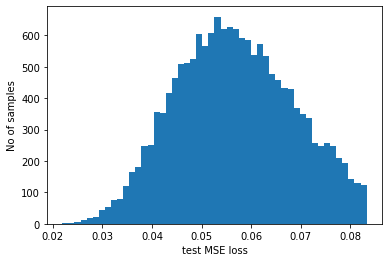

In [ ]:
TF_train_pred = newAE.predict(newlabelY)
TF_train_loss = np.mean(np.square(TF_train_pred - newlabelY), axis=1)
plt.hist(TF_train_loss, bins=50)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")

In [ ]:
# 새롭게 양품으로 label 된 것을 다시 합침
labelY = np.concatenate((labelY, newlabelY), axis=0)

In [ ]:
history = newAE.fit(labelY, labelY, batch_size=30, epochs=50, shuffle = True, validation_split=0.2, callbacks=[EarlyStopping(monitor="val_loss", patience=7, mode="min")])

Epoch 1/50
443/443 [==============================] - 1s 2ms/step - loss: 0.0459 - accuracy: 0.9915 - val_loss: 0.0314 - val_accuracy: 0.9943
Epoch 2/50
443/443 [==============================] - 1s 2ms/step - loss: 0.0277 - accuracy: 0.9914 - val_loss: 0.0273 - val_accuracy: 0.9943
Epoch 3/50
443/443 [==============================] - 1s 2ms/step - loss: 0.0269 - accuracy: 0.9920 - val_loss: 0.0271 - val_accuracy: 0.9943
Epoch 4/50
443/443 [==============================] - 1s 2ms/step - loss: 0.0267 - accuracy: 0.9922 - val_loss: 0.0281 - val_accuracy: 0.9943
Epoch 5/50
443/443 [==============================] - 1s 2ms/step - loss: 0.0266 - accuracy: 0.9922 - val_loss: 0.0294 - val_accuracy: 0.9943
Epoch 6/50
443/443 [==============================] - 1s 3ms/step - loss: 0.0264 - accuracy: 0.9926 - val_loss: 0.0273 - val_accuracy: 0.9943
Epoch 7/50
443/443 [==============================] - 1s 3ms/step - loss: 0.0264 - accuracy: 0.9923 - val_loss: 0.0277 - val_accuracy: 0.9943
Epoch 

In [ ]:
TF_train_pred = newAE.predict(labelY)
TF_train_loss = np.mean(np.square(TF_train_pred - labelY), axis=1)

Text(0, 0.5, 'No of samples')

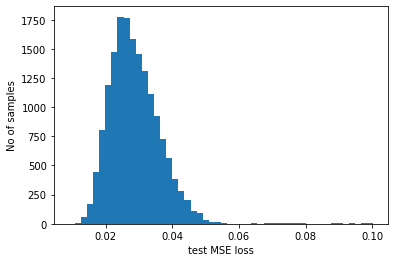

In [ ]:
plt.hist(TF_train_loss, bins=50)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")

In [ ]:
TF_unlabel_pred = newAE.predict(unlabel)
TF_unlabel_loss = np.mean(np.square(TF_unlabel_pred - unlabel), axis=1)

Text(0, 0.5, 'No of samples')

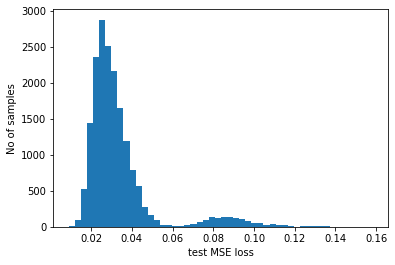

In [ ]:
plt.hist(TF_unlabel_loss, bins=50)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")

In [ ]:
TF_unlabel_loss2 = TF_unlabel_loss.reshape(TF_unlabel_loss.shape[0],1)

In [ ]:
gm = GaussianMixture(n_components=2, random_state=0).fit(TF_unlabel_loss2)
gm.means_
gm
gm.predict(TF_unlabel_loss2)
cov = gm.covariances_
print(gm.means_)
print([ np.sqrt(  np.trace(cov[i])/2) for i in range(0,2) ])
tmp = [ np.sqrt(  np.trace(cov[i])/2) for i in range(0,2) ]
m1 = min(gm.means_)
m2 = max(gm.means_)
std1 = min(tmp)
std2 = max(tmp)

[[0.08724381]
 [0.02906606]]
[0.0120175636776515, 0.005275771489210071]


In [ ]:
pred = gm.predict(TF_unlabel_loss2)
cluster1 = 0
cluster2 = 0
for i in pred:
  if i == 0:
    cluster1 += 1
  else:
    cluster2 += 1
clusterNum = [cluster1, cluster2]
print(max(clusterNum))
print(max(clusterNum)/min(clusterNum))
n = max(clusterNum)/min(clusterNum)

16688
11.564795564795565


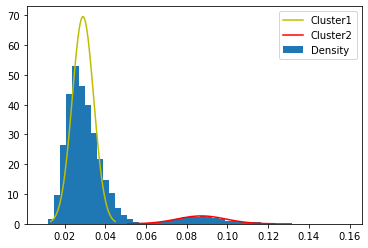

In [ ]:
plt.hist(TF_unlabel_loss, bins=50, density = True, label ='Density')

x = np.linspace(m1 - 3*std1, m1 + 3*std1, 100)
plt.plot(x, n/(n+1)*stats.norm.pdf(x, m1, std1), color = 'y', label = 'Cluster1')

y = np.linspace(m2 - 3*std2, m2 + 3*std2, 100)
plt.plot(y, 1/(n+1)*stats.norm.pdf(y, m2, std2), color = 'r', label = 'Cluster2')

plt.legend()
plt.show()

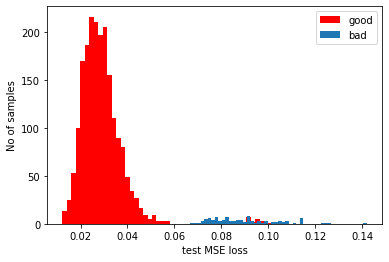

In [ ]:
# 평가 데이터의 양품

# 예측값
TF_predict_Y = newAE.predict(TF_test_Y2)

# 양품 평가 데이터의 복원 오차 (예측값 – 실제 값)
TF_test_Y_mse= np.mean(np.square(TF_predict_Y - TF_test_Y2), axis=1)


# 불량으로 판단한 데이터 확인.
TF_test_Y_anomalies = TF_test_Y_mse > threshold


# 평가 데이터의 불량

# 예측값
TF_predict_N = newAE.predict(TF_test_N2)
# 불량 평가 데이터의 복원 오차 (예측값 – 실제 값)
TF_test_N_mse = np.mean(np.square(TF_predict_N - TF_test_N2), axis=1)


plt.hist(TF_test_Y_mse, bins=50, color='r', label='good')
plt.hist(TF_test_N_mse, bins=50, label = 'bad')
# plt.axvline(threshold, color = 'y', linestyle = '--', label = "Threshold")
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.legend()
plt.show()

In [ ]:
pred = gm.predict(TF_unlabel_loss2)
cluster1 = 0
cluster2 = 0
for i in pred:
  if i == 0:
    cluster1 += 1
  else:
    cluster2 += 1
clusterNum = [cluster1, cluster2]
print(max(clusterNum))
print(max(clusterNum)/min(clusterNum))
n = max(clusterNum)/min(clusterNum)

16688
11.564795564795565


In [ ]:
a = 2*std2**2-2*std1**2
b = 4*std1**2*m2-4*std2**2*m1
c = 2*std2**2*m1**2-2*std1**2*m2**2-4*std1**2*std2**2*(np.log(n*std2/(std1)))
c2=2*std2**2*m1**2-2*std1**2*m2**2-4*std1**2*std2**2*(np.log(n*std2/(10*std1)))
c3=2*std2**2*m1**2-2*std1**2*m2**2-4*std1**2*std2**2*(np.log(n*std2/(100*std1)))
# c4=2*std2**2*m1**2-2*std1**2*m2**2-4*std1**2*std2**2*(np.log(n*std2/(300*std1)))
threshold = (-b+ np.sqrt(b**2 - 4 * a*c) )/ (2*a)
threshold2 = (-b+ np.sqrt(b**2 - 4 * a*c2) )/ (2*a)
threshold3 = (-b+ np.sqrt(b**2 - 4 * a*c3) )/ (2*a)
# threshold4 = (-b+ np.sqrt(b**2 - 4 * a*c4) )/ (2*a)

In [ ]:
TF_test_Y_anomalies = TF_test_Y_mse > threshold
TF_test_N_anomalies = TF_test_N_mse <= threshold

In [ ]:
TP = len(TF_test_Y_mse) - np.sum(TF_test_Y_anomalies)
FN = np.sum(TF_test_Y_anomalies)
FP = np.sum(TF_test_N_anomalies)
TN = len(TF_test_N_mse) - np.sum(TF_test_N_anomalies)

In [ ]:
print('Recall rate:', TP/(TP+FN))
print('Precision rate:', TP/(TP+FP))
print('Accuracy:', (TP+TN)/(TP+FP+FN+TN))
print('F1:', TP/(TP+0.5*(FP+FN)))

Recall rate: 0.974
Precision rate: 1.0
Accuracy: 0.9752380952380952
F1: 0.9868287740628167


불량 개수:  52


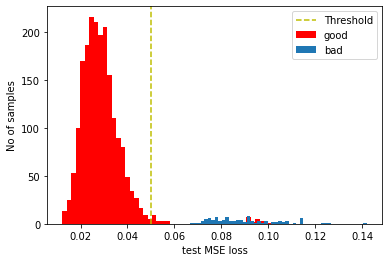

In [ ]:
# 평가 데이터의 양품

# 예측값
TF_predict_Y = newAE.predict(TF_test_Y2)

# 양품 평가 데이터의 복원 오차 (예측값 – 실제 값)
TF_test_Y_mse= np.mean(np.square(TF_predict_Y - TF_test_Y2), axis=1)


# 불량으로 판단한 데이터 확인.
TF_test_Y_anomalies = TF_test_Y_mse > threshold
print("불량 개수: ", np.sum(TF_test_Y_anomalies)) #결과는 아래에서 확인 가능하다

# 평가 데이터의 불량

# 예측값
TF_predict_N = newAE.predict(TF_test_N2)
# 불량 평가 데이터의 복원 오차 (예측값 – 실제 값)
TF_test_N_mse = np.mean(np.square(TF_predict_N - TF_test_N2), axis=1)


plt.hist(TF_test_Y_mse, bins=50, color='r', label='good')
plt.hist(TF_test_N_mse, bins=50, label = 'bad')
plt.axvline(threshold, color = 'y', linestyle = '--', label = "Threshold")
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")

# x = np.linspace(m1 - 3*std1, m1 + 3*std1, 100)
# plt.plot(x, n*0.5*stats.norm.pdf(x, m1, std1), color = 'y')

# y = np.linspace(m2 - 3*std2, m2 + 3*std2, 100)
# plt.plot(y, 0.5*stats.norm.pdf(y, m2, std2), color = 'g')

plt.legend()
plt.show()

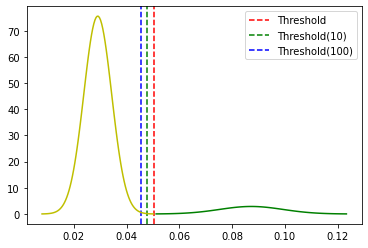

In [ ]:
plt.axvline(threshold, color = 'r', linestyle = '--', label = "Threshold")
plt.axvline(threshold2, color = 'g', linestyle = '--', label = "Threshold(10)")
plt.axvline(threshold3, color = 'b', linestyle = '--', label = "Threshold(100)")
# plt.axvline(threshold4, color = 'c', linestyle = '--', label = "Threshold(500)")

x = np.linspace(m1 - 4*std1, m1 + 4*std1, 100)
plt.plot(x, stats.norm.pdf(x, m1, std1), color = 'y')

y = np.linspace(m2 - 3*std2, m2 + 3*std2, 100)
plt.plot(y, (stats.norm.pdf(y, m2, std2))/n, color = 'g')

plt.legend()
plt.show()

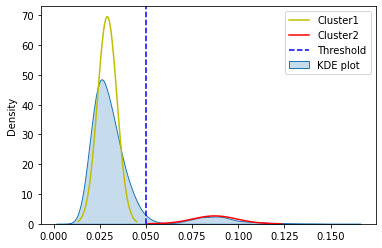

In [ ]:
# unlabel된 총 데이터의 kde plot과 예측값의 kde plot

sns.kdeplot(TF_unlabel_loss, shade = True, label = 'KDE plot')
x = np.linspace(m1 - 3*std1, m1 + 3*std1, 100)
plt.plot(x, n/(n+1)*stats.norm.pdf(x, m1, std1), color = 'y', label = 'Cluster1')

y = np.linspace(m2 - 3*std2, m2 + 3*std2, 100)
plt.plot(y, 1/(n+1)*stats.norm.pdf(y, m2, std2), color = 'r', label = 'Cluster2')
plt.axvline(threshold, color = 'b', linestyle = '--', label = "Threshold")

plt.legend()